# Data

Read in the three files: clients.csv, loans.csv, payments.csv. These files are related by the following:
1. The clients file is the parent of the loans file. Each client can have multiple distinct loans. The client_id column links the two files
2. The loans file is the child of the clients file and the parent of the payments file. Each loan can have multiple distinct payments associated with it. The loan_id column links the two files.

In [1]:
# Import basic packages.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the data sets into data frames.
clients = pd.read_csv('clients.csv')
loans = pd.read_csv('loans.csv')
payments = pd.read_csv('payments.csv')

In [3]:
# Quick check of the structure of the data.
clients.info()
loans.info()
payments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     25 non-null     int64 
 1   joined        25 non-null     object
 2   income        25 non-null     int64 
 3   credit_score  25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB
<cla

In [6]:
print(clients.shape)
print(loans.shape)
print(payments.shape)

(25, 4)
(443, 8)
(3456, 4)
(25, 16)


With the above datasets, answer the following questions. Show the steps taken to produce your final answer.

# Section 1 Questions

1. Give the 5 client IDs with the highest mean payment amount
2. How many unique loans have been given out to clients who joined prior to 2001?
3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

In [19]:
# loan_ids with highest mean payment amount.
highest_loan_ids = payments[['loan_id', 'payment_amount']]. \
                   groupby('loan_id'). \
                   mean(). \
                   sort_values(ascending=False, by='payment_amount'). \
                   head(5)
# Client ids with top 5 mean payment amount.
pd.merge(highest_loan_ids, loans, on='loan_id')['client_id']

0    38537
1    49545
2    26695
3    35214
4    29841
Name: client_id, dtype: int64

In [23]:
# Convert the attribute 'joined' in the dataframe clients in datatime format.
clients['joined'] = pd.to_datetime(clients['joined'])
clients_prior_to_2001 = clients.loc[clients['joined'].dt.year <= 2001]['client_id']
pd.merge(clients_prior_to_2001, loans, on='client_id')

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46180,home,3022,0,11204,2003-11-22,2005-05-18,8.39
1,46180,credit,9282,1,10664,2008-03-03,2010-05-16,3.16
2,46180,cash,14007,1,10416,2003-12-05,2005-05-14,3.95
3,46180,cash,5943,0,11317,2011-10-18,2013-11-03,6.86
4,46180,other,3834,0,10887,2014-05-03,2016-02-24,1.38
...,...,...,...,...,...,...,...,...
80,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
81,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
82,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65
83,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50


# Section 2 Questions

In [43]:
# Clients with credit score < 700.
clients_poor_cs = clients.loc[clients['credit_score'] < 700]['client_id']
# Loan ids of these clients.
loan_ids_poor_cs = pd.merge(clients_poor_cs, loans, on='client_id')[['client_id', 'loan_id']]
# Payment details of these clients.
payments_poor_cs = pd.merge(loan_ids_poor_cs, payments, on='loan_id')
# Get count of missed payments by client.
missed_payments = payments_poor_cs.loc[payments_poor_cs['missed'] == 1].groupby('client_id').count()['missed']
# Get the mean number of missed payments where the missed count > 50. 
missed_payments[missed_payments > 50].mean()


69.25

Create the following visualizations:
    
1. Create a histogram of the payment amounts. Briefly describe the distribution.
2. Produce a line plot the cumulative sum of the number of clients by year.
3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

<AxesSubplot:>

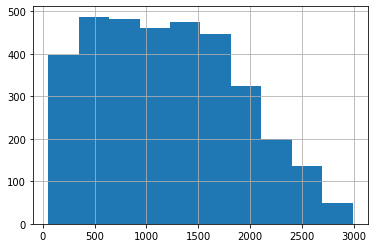

In [44]:
payments['payment_amount'].hist()

Text(0.5, 1.0, 'Cumulative sum of clients by year')

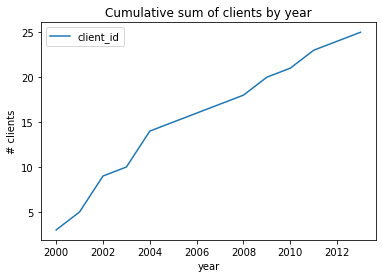

In [63]:
clients['joined_year'] = clients['joined'].dt.year
ax = clients[['client_id', 'joined_year']].groupby('joined_year').count().cumsum().reset_index().plot('joined_year', 'client_id')
ax.set_xlabel('year')
ax.set_ylabel('# clients')
ax.set_title('Cumulative sum of clients by year')


Text(0.5, 1.0, 'Percentage of payments missed in December')

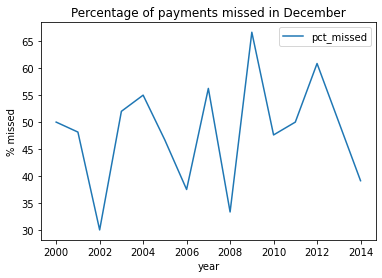

In [86]:
payments['payment_date'] = pd.to_datetime(payments['payment_date'])
payments['payment_year'] = payments['payment_date'].dt.year
payments['payment_month'] = payments['payment_date'].dt.month
dec_count = payments.loc[payments['payment_month'] == 12][['loan_id', 'payment_year']].groupby('payment_year').count().rename(columns={'loan_id': 'n_loans'}).reset_index()
#
dec_missed_count = payments.loc[((payments['payment_month'] == 12) & (payments['missed'] == 1))][['loan_id', 'payment_year']].groupby('payment_year').count().rename(columns={'loan_id': 'n_loans_missed'}).reset_index()

X = pd.merge(dec_count, dec_missed_count, on='payment_year')
X['pct_missed'] = round(X['n_loans_missed']/X['n_loans'] * 100, 2)
ax = X.plot('payment_year', 'pct_missed')
ax.set_xlabel('year')
ax.set_ylabel('% missed')
ax.set_title('Percentage of payments missed in December')

# Section 3 - Modelling

Create a model that will predict whether a person does or does not have diabetes. Use the diabetes.csv dataset. The target column in the dataset is "Outcome". Assume no features leak information about the target.

Your solution should include the below. You may use whichever python libraries you wish to complete the task:
1. Feature engineering
2. Model fitting and performance evaluation
3. A function that takes as arguments: a model, train data, test data, and returns the model's predictions on the test data
4. A function that takes a set of predictions and true values and that validates the predictions using appropriate metrics
5. Anything else you feel is necessary for modelling or improving the performance of your model


__This exercise is intended for you to show your proficiency in machine learning, understanding of the various techniques that can be employed to improve the performance of a model, and your ability to implement those techniques. Please, therefore, show your working at all times. You will be judged more for the above than for the performance of the final model your produce.__